# Notebook to performs the inference with some image folder

In [43]:
# Import libraries
import tensorflow as tf
import cv2
import os
import numpy as np
from glob import glob
from time import time
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [9]:
# Get image list
file_list = glob('../nuevo_dataset/test/con_mascarilla1/*')

In [15]:
# Load TF model
new_model = tf.keras.models.load_model('../models/vgg_test.h5')

In [16]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [44]:
# Define some parameters
dim = (224, 224)

In [46]:
# Make predictions
label = 1
for file in file_list:
    tic=time()
    image=cv2.imread(file,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dim)
    image = image.reshape(-1,224,224,3)
    preds = new_model.predict(image).astype('int')
    pred = preds[0][0]
    toc=time()-tic
    print("label: {}, prediction:{}, time(s): {}". format(label, pred, toc))

label: 1, prediction:0, time(s): 0.15352201461791992
label: 1, prediction:0, time(s): 0.13763189315795898
label: 1, prediction:0, time(s): 0.14461350440979004
label: 1, prediction:0, time(s): 0.14165043830871582
label: 1, prediction:0, time(s): 0.14261770248413086
label: 1, prediction:0, time(s): 0.13962745666503906
label: 1, prediction:1, time(s): 0.15259122848510742
label: 1, prediction:0, time(s): 0.1406242847442627
label: 1, prediction:0, time(s): 0.15059638023376465
label: 1, prediction:0, time(s): 0.14760589599609375
label: 1, prediction:0, time(s): 0.14261841773986816
label: 1, prediction:1, time(s): 0.13962697982788086
label: 1, prediction:0, time(s): 0.1406254768371582
label: 1, prediction:0, time(s): 0.1386270523071289
label: 1, prediction:0, time(s): 0.14162206649780273
label: 1, prediction:1, time(s): 0.13763093948364258
label: 1, prediction:0, time(s): 0.14461302757263184
label: 1, prediction:0, time(s): 0.1376328468322754
label: 1, prediction:0, time(s): 0.141620397567749

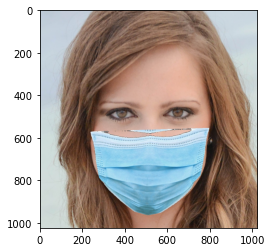

In [50]:
# Show some picture
image=cv2.imread(file_list[0],1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)